MNIST 숫자 데이터를 인식하고 검증하는 코드를 구현

In [1]:
import sys, os
import numpy as np
import matplotlib.pyplot as plt
sys.path.insert(0, r'C:\Users\USER\ms-deep-learning\deep-learning\notebooks\deep-learning-basic')
from dataset.mnist import load_mnist
from two_layer_net import TwoLayerNet

In [50]:
# 데이터 불러오기
(X_train, t_train), (X_test, t_test) = load_mnist(normalize=True, one_hot_label=True)

# 모델 인스턴스 생성
network = TwoLayerNet(input_size=784, hidden_size=512, output_size=10)

In [56]:
# 하이퍼파라미터 지정
iters_num = 5000 # 반복횟수 설정
train_size = X_train.shape[0]
batch_size = 100
learning_rate = 0.6

train_loss_list = []
train_acc_list = []
test_acc_list = []

iter_per_epoch = max(train_size / batch_size, 1)

In [57]:
for i in range(iters_num):
    # 미니 배치 획득
    batch_mask = np.random.choice(train_size, batch_size)
    x_batch = X_train[batch_mask]
    t_batch = t_train[batch_mask]

    # 기울기 계산 
    # grad = network.numerical_gradient(x_batch, t_batch)
    grad = network.gradient(x_batch, t_batch)

    # 매개변수 갱신
    for key in ('W1', 'b1', 'W2', 'b2'):
        network.params[key] -= learning_rate * grad[key]
    
    # 학습 경과 기록
    loss = network.loss(x_batch, t_batch)
    train_loss_list.append(loss)

    # 1에코프당 정확도 계산
    if i % iter_per_epoch == 0:
        train_acc = network.accuracy(X_train, t_train)
        test_acc = network.accuracy(X_test, t_test)
        train_acc_list.append(train_acc)
        test_acc_list.append(test_acc)
        print(i, "train acc, test acc | " + str(train_acc)+", " + str(test_acc))

0 train acc, test acc | 0.9901, 0.9776
600 train acc, test acc | 0.9912166666666666, 0.9783
1200 train acc, test acc | 0.9903333333333333, 0.976
1800 train acc, test acc | 0.9925833333333334, 0.9787
2400 train acc, test acc | 0.9928333333333333, 0.9791
3000 train acc, test acc | 0.9932833333333333, 0.979
3600 train acc, test acc | 0.9938666666666667, 0.9802
4200 train acc, test acc | 0.9945833333333334, 0.9794
4800 train acc, test acc | 0.9949666666666667, 0.9789


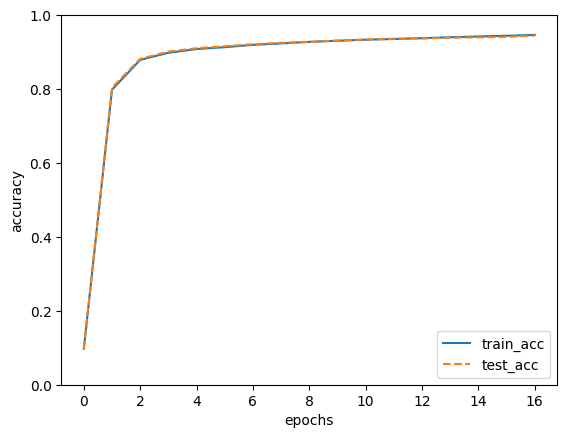

In [7]:
makrers = {'train': 'o', 'test': 's'}

x = np.arange(len(train_acc_list))

plt.plot(x, train_acc_list, label = 'train_acc')
plt.plot(x, test_acc_list, label = 'test_acc', linestyle ='--')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.ylim(0, 1.0)
plt.legend(loc='lower right')
plt.show()

/mnt/batch/tasks/shared/LS_root/mounts/clusters/el202/code/Users/el20/DL/ch03
/mnt/batch/tasks/shared/LS_root/mounts/clusters/el202/code/Users/el20/DL
0 train acc, test acc | 0.10441666666666667, 0.1028
600 train acc, test acc | 0.7849833333333334, 0.7935
1200 train acc, test acc | 0.8758666666666667, 0.8795
1800 train acc, test acc | 0.8974833333333333, 0.9005
2400 train acc, test acc | 0.90655, 0.9101
3000 train acc, test acc | 0.9133333333333333, 0.9153
3600 train acc, test acc | 0.9194833333333333, 0.9215
4200 train acc, test acc | 0.9246833333333333, 0.926
4800 train acc, test acc | 0.9281166666666667, 0.9288
5400 train acc, test acc | 0.9314, 0.9327
6000 train acc, test acc | 0.9346, 0.936
6600 train acc, test acc | 0.9369666666666666, 0.9376
7200 train acc, test acc | 0.9397, 0.9398
7800 train acc, test acc | 0.9418166666666666, 0.941
8400 train acc, test acc | 0.9433666666666667, 0.9422
9000 train acc, test acc | 0.9460833333333334, 0.9445
9600 train acc, test acc | 0.9478, 0.9

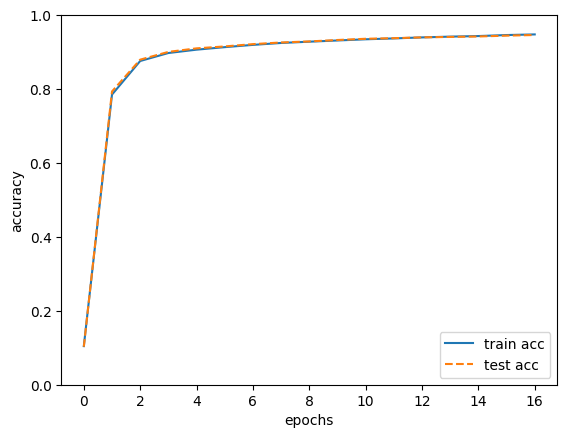